In [2]:
import sys
sys.path.append("../")

import torch
from torch_geometric.utils import stochastic_blockmodel_graph, to_dense_adj, erdos_renyi_graph
from torch_geometric.data import Data
import pickle
from torch_geometric.utils import dropout_node

# CiteSeer

In [47]:
from torch_geometric.datasets import Planetoid

# LOAD ORIGINAL GRAPH
dataset = Planetoid(root='dataset/', name='CiteSeer', split='public', transform=None)
data = dataset[0]


num_nodes = data.y.shape[0]
edge_index = data.edge_index
labels = data.y

print(data)

print(torch.unique(data.y).shape[0])

Data(x=[3327, 3703], edge_index=[2, 9104], y=[3327], train_mask=[3327], val_mask=[3327], test_mask=[3327])
6


In [48]:
d = 6
A = to_dense_adj(data.edge_index).squeeze(0)
u, V = torch.linalg.eig(A)

list_q=[]
for i in range(d):
    if u[i].numpy()>0:
        list_q.append(1)
    else:
        list_q.append(-1)
list_q.sort(reverse=True)
q = torch.Tensor(list_q)
print("Vector q: ", q)
Q = torch.diag(q)

Vector q:  tensor([ 1.,  1.,  1., -1., -1., -1.])


/home/sofia/lase/lib/python3.10/site-packages/graspologic/embed/base.py:199: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)


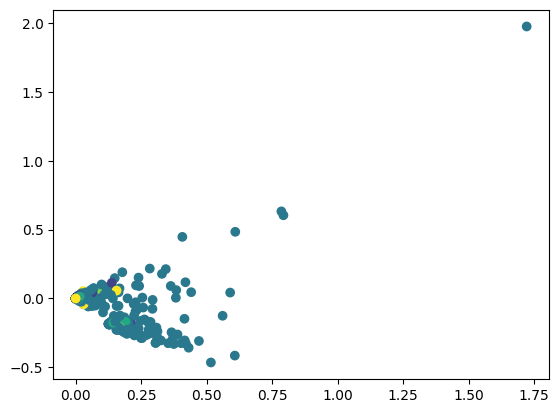

In [53]:
## ASE 
from graspologic.embed import AdjacencySpectralEmbed 

adj_matrix = to_dense_adj(edge_index).squeeze(0).numpy()
ase = AdjacencySpectralEmbed(n_components=d, diag_aug=True, algorithm='full')
x_ase = ase.fit_transform(adj_matrix)
x_ase = torch.from_numpy(x_ase)


import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x_ase[:,0], x_ase[:,1], c = labels)
plt.show()

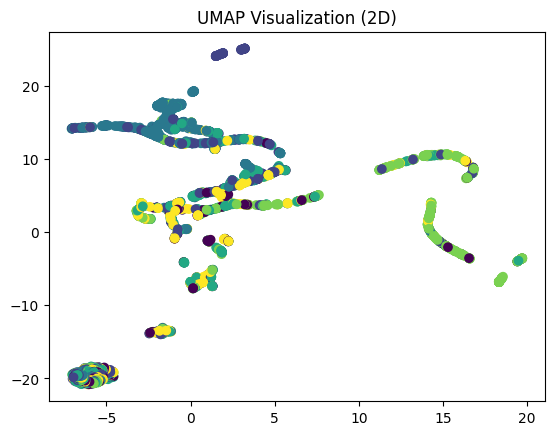

In [54]:
import umap
import numpy as np

x_emb = x_ase.numpy()

# Initialize and fit the UMAP model with 2 components (dimensions)
umap_model = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, metric='euclidean')
umap_embedding = umap_model.fit_transform(x_emb)

# 'umap_embedding' now contains the reduced-dimensional representation of your data with 2 dimensions

# You can visualize the UMAP embedding if needed (optional)
import matplotlib.pyplot as plt

plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c = labels)
plt.title('UMAP Visualization (2D)')
plt.show()


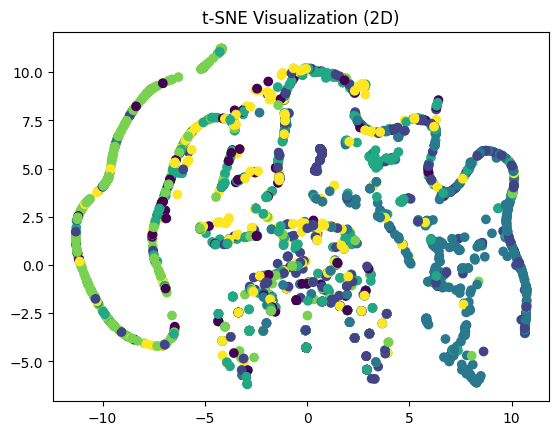

In [55]:
from sklearn.manifold import TSNE
import numpy as np

# Initialize and fit the t-SNE model with 2 components (dimensions)
tsne_model = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_embedding = tsne_model.fit_transform(x_emb)

# 'tsne_embedding' now contains the reduced-dimensional representation of your data with 2 dimensions

# You can visualize the t-SNE embedding if needed (optional)
import matplotlib.pyplot as plt

plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c = labels)
plt.title('t-SNE Visualization (2D)')
plt.show()


# Cora

In [3]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='../', name='Cora', split='public', transform=None)
data = dataset[0]
print(data)

num_nodes = data.y.shape[0]
edge_index = data.edge_index
labels = data.y

print(torch.unique(data.y).shape[0])

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
7


In [4]:
d = torch.unique(data.y).shape[0]
A = to_dense_adj(data.edge_index).squeeze(0)
u, V = torch.linalg.eig(A)

list_q=[]
for i in range(d):
    if u[i].numpy()>0:
        list_q.append(1)
    else:
        list_q.append(-1)
list_q.sort(reverse=True)
q = torch.Tensor(list_q)
print("Vector q: ", q)
Q = torch.diag(q)

Vector q:  tensor([ 1.,  1.,  1.,  1., -1., -1., -1.])


/home/sofia/lase/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/sofia/lase/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/sofia/lase/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopyth

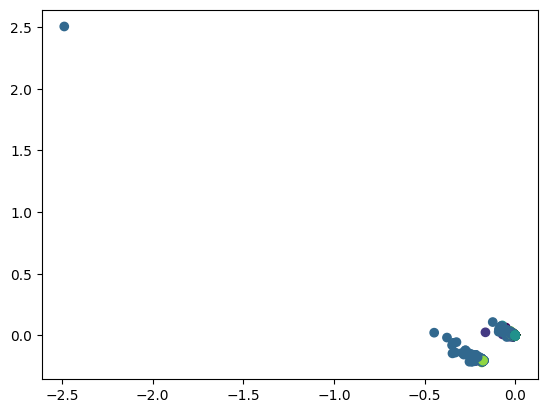

In [5]:
## ASE 
from graspologic.embed import AdjacencySpectralEmbed 

adj_matrix = to_dense_adj(edge_index).squeeze(0).numpy()
ase = AdjacencySpectralEmbed(n_components=d, diag_aug=True, algorithm='full')
x_ase = ase.fit_transform(adj_matrix)
x_ase = torch.from_numpy(x_ase)


import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x_ase[:,0], x_ase[:,1], c = labels)
plt.show()

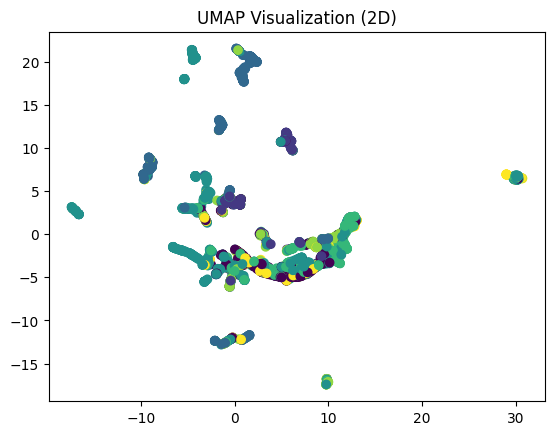

In [6]:
import umap
import numpy as np

x_emb = x_ase.numpy()

# Initialize and fit the UMAP model with 2 components (dimensions)
umap_model = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, metric='euclidean')
umap_embedding = umap_model.fit_transform(x_emb)

# 'umap_embedding' now contains the reduced-dimensional representation of your data with 2 dimensions

# You can visualize the UMAP embedding if needed (optional)
import matplotlib.pyplot as plt

plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c = labels)
plt.title('UMAP Visualization (2D)')
plt.show()


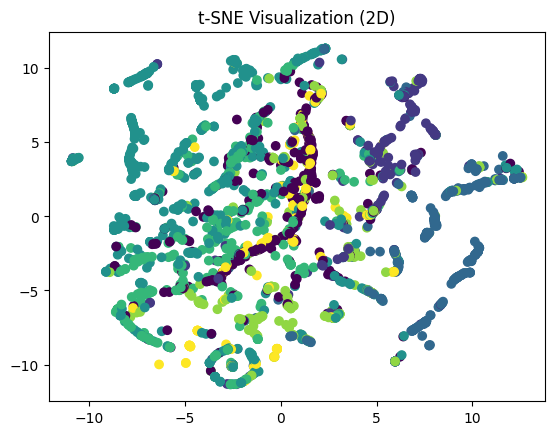

In [7]:
from sklearn.manifold import TSNE
import numpy as np

# Initialize and fit the t-SNE model with 2 components (dimensions)
tsne_model = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_embedding = tsne_model.fit_transform(x_emb)

# 'tsne_embedding' now contains the reduced-dimensional representation of your data with 2 dimensions

# You can visualize the t-SNE embedding if needed (optional)
import matplotlib.pyplot as plt

plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c = labels)
plt.title('t-SNE Visualization (2D)')
plt.show()


# Amazon

In [8]:
import torch 
from torch_geometric.datasets.amazon import Amazon
from torch_geometric.utils import to_dense_adj
import matplotlib.pyplot as plt

# LOAD ORIGINAL GRAPH
dataset = Amazon(root='./training/dataset/amazon', name = 'Photo')
data = dataset[0]

/home/sofia/lase/lib/python3.10/site-packages/graspologic/embed/base.py:199: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)


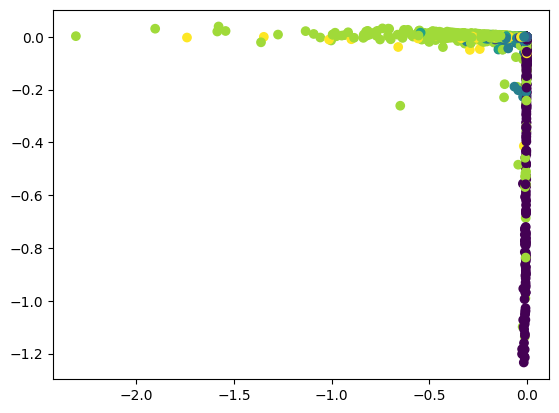

In [9]:
import torch 
from torch_geometric.datasets.amazon import Amazon
from torch_geometric.utils import to_dense_adj
import matplotlib.pyplot as plt

# LOAD ORIGINAL GRAPH
dataset = Amazon(root='./training/dataset/amazon', name = 'Photo')
data = dataset[0]

num_nodes = data.y.shape[0]
edge_index = data.edge_index
labels = data.y

d = 8
device = 'cpu'

## ASE 
from graspologic.embed import AdjacencySpectralEmbed 

adj_matrix = to_dense_adj(data.edge_index.to(device)).squeeze(0).numpy()
ase = AdjacencySpectralEmbed(n_components=d, diag_aug=True, algorithm='full')
x_ase = ase.fit_transform(adj_matrix)
x_ase = torch.from_numpy(x_ase)


plt.figure()
plt.scatter(x_ase[:,0], x_ase[:,1], c = labels)
plt.show()

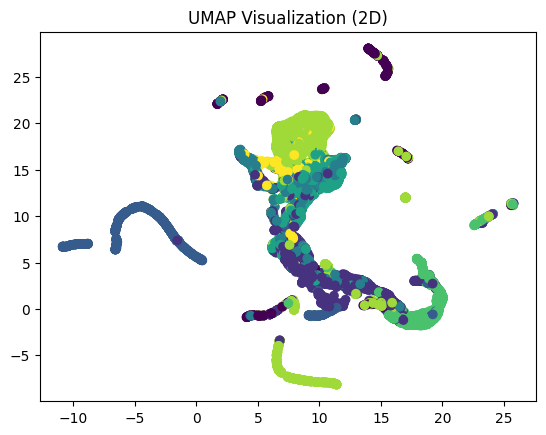

In [4]:
import umap
import numpy as np

x_emb = x_ase.numpy()

# Initialize and fit the UMAP model with 2 components (dimensions)
umap_model = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, metric='euclidean')
umap_embedding = umap_model.fit_transform(x_emb)

# 'umap_embedding' now contains the reduced-dimensional representation of your data with 2 dimensions

# You can visualize the UMAP embedding if needed (optional)
import matplotlib.pyplot as plt

plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c = labels)
plt.title('UMAP Visualization (2D)')
plt.show()


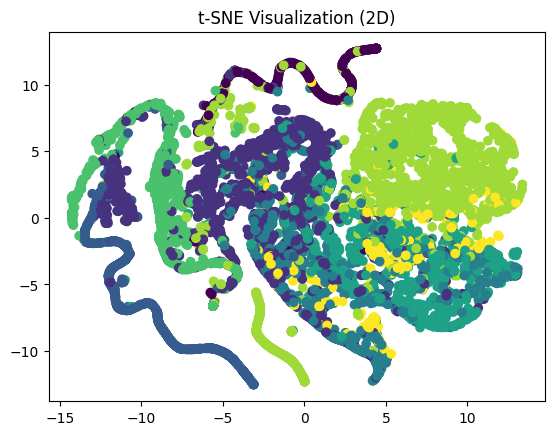

In [5]:
from sklearn.manifold import TSNE
import numpy as np

# Initialize and fit the t-SNE model with 2 components (dimensions)
tsne_model = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_embedding = tsne_model.fit_transform(x_emb)

# 'tsne_embedding' now contains the reduced-dimensional representation of your data with 2 dimensions

# You can visualize the t-SNE embedding if needed (optional)
import matplotlib.pyplot as plt

plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c = labels)
plt.title('t-SNE Visualization (2D)')
plt.show()


# Twitch

In [10]:
import torch 
from torch_geometric.datasets.twitch import Twitch
from torch_geometric.utils import to_dense_adj
import matplotlib.pyplot as plt

# LOAD ORIGINAL GRAPH
dataset = Twitch(root='./training/dataset/twitch', name = 'ES')
data = dataset[0]

print(data)

Data(x=[4648, 128], edge_index=[2, 123412], y=[4648])


Processing...
Done!


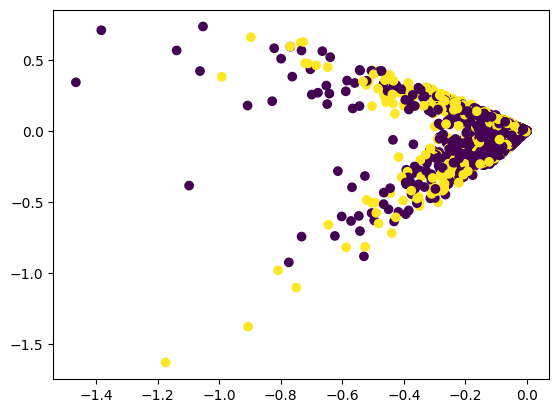

In [11]:
num_nodes = data.y.shape[0]
edge_index = data.edge_index
labels = data.y

d = 2
device = 'cpu'

## ASE 
from graspologic.embed import AdjacencySpectralEmbed 

adj_matrix = to_dense_adj(data.edge_index.to(device)).squeeze(0).numpy()
ase = AdjacencySpectralEmbed(n_components=d, diag_aug=True, algorithm='full')
x_ase = ase.fit_transform(adj_matrix)
x_ase = torch.from_numpy(x_ase)
# loss = np.linalg.norm((x_ase@Q@x_ase.T - to_dense_adj(data.edge_index).squeeze(0).numpy())*to_dense_adj(mask).squeeze(0))
# print("Loss Graspologic ASE: ", loss)


plt.figure()
plt.scatter(x_ase[:,0], x_ase[:,1], c = labels)
plt.show()

# Chameleon

In [105]:
from torch_geometric.datasets import WikipediaNetwork
import matplotlib.pyplot as plt

dataset = WikipediaNetwork(root='../', name='chameleon')
data = dataset[0]
print(data)


torch.unique(data.y)

Data(x=[2277, 2325], edge_index=[2, 36101], y=[2277], train_mask=[2277, 10], val_mask=[2277, 10], test_mask=[2277, 10])


tensor([0, 1, 2, 3, 4])

In [ ]:
d = 5
device = 'cpu'

## ASE 
from graspologic.embed import AdjacencySpectralEmbed 

adj_matrix = to_dense_adj(data.edge_index.to(device)).squeeze(0).numpy()
adj_matrix = adj_matrix + adj_matrix.T
ase = AdjacencySpectralEmbed(n_components=d, diag_aug=True, algorithm='full')
x_ase = ase.fit_transform(adj_matrix)
x_ase = torch.from_numpy(x_ase)

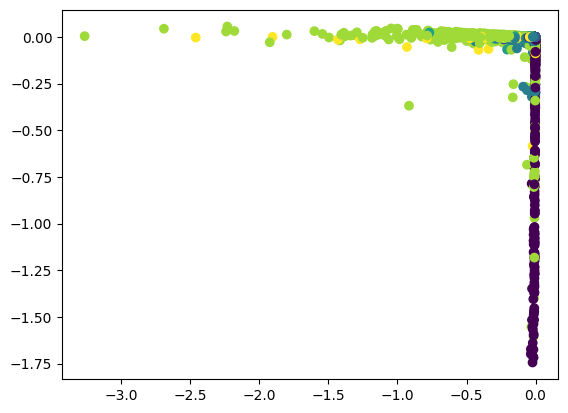

In [60]:
labels = data.y
plt.figure()
plt.scatter(x_ase[:,0], x_ase[:,1], c = labels)
plt.show()

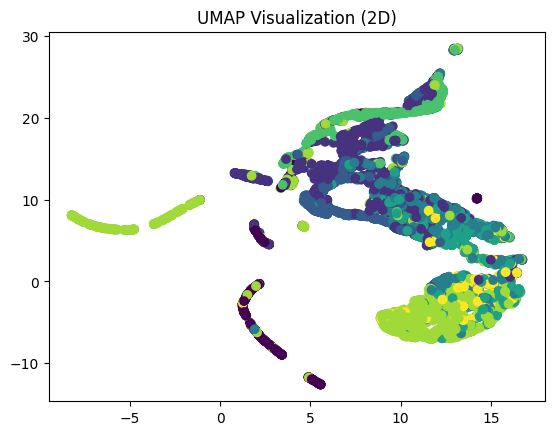

In [61]:
import umap
import numpy as np
import matplotlib.pyplot as plt

x_emb = x_ase.numpy()

umap_model = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, metric='euclidean')
umap_embedding = umap_model.fit_transform(x_emb)

plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c = labels)
plt.title('UMAP Visualization (2D)')
plt.show()


# RESULTS

## Cora

### Full

In [2]:
import pickle
import numpy as np
from scipy.stats import sem

FEAT_RESULTS = '../training/results/feat_cora_GAT_results.pkl'
ASE_RESULTS = '../training/results/ase_cora_GAT_results.pkl'
GLASE_RESULTS = '../training/results/glase_cora_GAT_results.pkl'
GLASE_RESULTS_E2E = '../training/results/glase_cora_results_e2e_FULL_v2.pkl'


with open(FEAT_RESULTS, 'rb') as f:
    feat_results = pickle.load(f)
    
with open(ASE_RESULTS, 'rb') as f:
    ase_results = pickle.load(f)

with open(GLASE_RESULTS, 'rb') as f:
    glase_results = pickle.load(f)
    
with open(GLASE_RESULTS_E2E, 'rb') as f:
    glase_results_e2e = pickle.load(f)
    

print(f'FEATURES: {np.array(feat_results).mean()*100:.2f} +/- {sem(feat_results)*100:.2f}')
print(f'ASE: {np.array(ase_results).mean()*100:.2f} +/- {sem(ase_results)*100:.2f}')
print(f'GLASE: {np.array(glase_results).mean()*100:.2f} +/- {sem(glase_results)*100:.2f}')
print(f'GLASE E2E: {np.array(glase_results_e2e).mean()*100:.2f} +/- {sem(glase_results_e2e)*100:.2f}')

FEATURES: 86.80 +/- 0.43
ASE: 86.45 +/- 0.55
GLASE: 86.43 +/- 0.33
GLASE E2E: 86.92 +/- 0.34


### ER08

In [3]:
import pickle
import numpy as np
from scipy.stats import sem

FEAT_RESULTS = '../training/results/feat_cora_GAT_results_ER08.pkl'
ASE_RESULTS = '../training/results/ase_cora_GAT_results_ER08.pkl'
GLASE_RESULTS = '../training/results/glase_cora_GAT_results_ER08.pkl'
GLASE_RESULTS_E2E = '../training/results/glase_cora_results_e2e_ER08_v2.pkl'


with open(FEAT_RESULTS, 'rb') as f:
    feat_results = pickle.load(f)
    
with open(ASE_RESULTS, 'rb') as f:
    ase_results = pickle.load(f)

with open(GLASE_RESULTS, 'rb') as f:
    glase_results = pickle.load(f)
    
with open(GLASE_RESULTS_E2E, 'rb') as f:
    glase_results_e2e = pickle.load(f)
    

print(f'FEATURES: {np.array(feat_results).mean()*100:.2f} +/- {sem(feat_results)*100:.2f}')
print(f'ASE: {np.array(ase_results).mean()*100:.2f} +/- {sem(ase_results)*100:.2f}')
print(f'GLASE: {np.array(glase_results).mean()*100:.2f} +/- {sem(glase_results)*100:.2f}')
print(f'GLASE E2E: {np.array(glase_results_e2e).mean()*100:.2f} +/- {sem(glase_results_e2e)*100:.2f}')

FEATURES: 84.57 +/- 0.30
ASE: 85.05 +/- 0.49
GLASE: 84.86 +/- 0.35
GLASE E2E: 85.60 +/- 0.31


### ER06

In [4]:
import pickle
import numpy as np
from scipy.stats import sem

FEAT_RESULTS = '../training/results/feat_cora_GAT_results_ER06.pkl'
ASE_RESULTS = '../training/results/ase_cora_GAT_results_ER06.pkl'
GLASE_RESULTS = '../training/results/glase_cora_GAT_results_ER06.pkl'
GLASE_RESULTS_E2E = '../training/results/glase_cora_results_e2e_ER06_v2.pkl'


with open(FEAT_RESULTS, 'rb') as f:
    feat_results = pickle.load(f)
    
with open(ASE_RESULTS, 'rb') as f:
    ase_results = pickle.load(f)

with open(GLASE_RESULTS, 'rb') as f:
    glase_results = pickle.load(f)
    
with open(GLASE_RESULTS_E2E, 'rb') as f:
    glase_results_e2e = pickle.load(f)
    

print(f'FEATURES: {np.array(feat_results).mean()*100:.2f} +/- {sem(feat_results)*100:.2f}')
print(f'ASE: {np.array(ase_results).mean()*100:.2f} +/- {sem(ase_results)*100:.2f}')
print(f'GLASE: {np.array(glase_results).mean()*100:.2f} +/- {sem(glase_results)*100:.2f}')
print(f'GLASE E2E: {np.array(glase_results_e2e).mean()*100:.2f} +/- {sem(glase_results_e2e)*100:.2f}')

FEATURES: 83.08 +/- 0.29
ASE: 83.20 +/- 0.48
GLASE: 83.57 +/- 0.31
GLASE E2E: 86.52 +/- 0.43


### ER04

In [5]:
import pickle
import numpy as np
from scipy.stats import sem

FEAT_RESULTS = '../training/results/feat_cora_GAT_results_ER04.pkl'
ASE_RESULTS = '../training/results/ase_cora_GAT_results_ER04.pkl'
GLASE_RESULTS = '../training/results/glase_cora_GAT_results_ER04.pkl'
GLASE_RESULTS_E2E = '../training/results/glase_cora_results_e2e_ER04_v2.pkl'


with open(FEAT_RESULTS, 'rb') as f:
    feat_results = pickle.load(f)
    
with open(ASE_RESULTS, 'rb') as f:
    ase_results = pickle.load(f)

with open(GLASE_RESULTS, 'rb') as f:
    glase_results = pickle.load(f)
    
with open(GLASE_RESULTS_E2E, 'rb') as f:
    glase_results_e2e = pickle.load(f)
    

print(f'FEATURES: {np.array(feat_results).mean()*100:.2f} +/- {sem(feat_results)*100:.2f}')
print(f'ASE: {np.array(ase_results).mean()*100:.2f} +/- {sem(ase_results)*100:.2f}')
print(f'GLASE: {np.array(glase_results).mean()*100:.2f} +/- {sem(glase_results)*100:.2f}')
print(f'GLASE E2E: {np.array(glase_results_e2e).mean()*100:.2f} +/- {sem(glase_results_e2e)*100:.2f}')

FEATURES: 79.28 +/- 0.54
ASE: 79.01 +/- 0.30
GLASE: 78.99 +/- 0.57
GLASE E2E: 85.45 +/- 0.62


### ER02

In [6]:
import pickle
import numpy as np
from scipy.stats import sem

FEAT_RESULTS = '../training/results/feat_cora_GAT_results_ER02.pkl'
ASE_RESULTS = '../training/results/ase_cora_GAT_results_ER02.pkl'
GLASE_RESULTS = '../training/results/glase_cora_GAT_results_ER02.pkl'
GLASE_RESULTS_E2E = '../training/results/glase_cora_results_e2e_ER02_v2.pkl'


with open(FEAT_RESULTS, 'rb') as f:
    feat_results = pickle.load(f)
    
with open(ASE_RESULTS, 'rb') as f:
    ase_results = pickle.load(f)

with open(GLASE_RESULTS, 'rb') as f:
    glase_results = pickle.load(f)
    
with open(GLASE_RESULTS_E2E, 'rb') as f:
    glase_results_e2e = pickle.load(f)
    

print(f'FEATURES: {np.array(feat_results).mean()*100:.2f} +/- {sem(feat_results)*100:.2f}')
print(f'ASE: {np.array(ase_results).mean()*100:.2f} +/- {sem(ase_results)*100:.2f}')
print(f'GLASE: {np.array(glase_results).mean()*100:.2f} +/- {sem(glase_results)*100:.2f}')
print(f'GLASE E2E: {np.array(glase_results_e2e).mean()*100:.2f} +/- {sem(glase_results_e2e)*100:.2f}')

FEATURES: 73.78 +/- 0.76
ASE: 72.98 +/- 0.59
GLASE: 72.65 +/- 0.65
GLASE E2E: 83.39 +/- 0.41


## Amazon

### Full

In [51]:
import pickle
import numpy as np

from scipy.stats import sem

FEAT_RESULTS = '../training/results/feat_amazon_GAT_results.pkl'
ASE_RESULTS = '../training/results/ase_amazon_GAT_results.pkl'
GLASE_RESULTS = '../training/results/glase_amazon_GAT_results.pkl'
GLASE_RESULTS_E2E = '../training/results/glase_amazon_GAT_results_v2.pkl'


with open(FEAT_RESULTS, 'rb') as f:
    feat_results = pickle.load(f)
    
with open(ASE_RESULTS, 'rb') as f:
    ase_results = pickle.load(f)

with open(GLASE_RESULTS, 'rb') as f:
    glase_results = pickle.load(f)
    
# with open(GLASE_RESULTS_E2E, 'rb') as f:
#     glase_results_e2e = pickle.load(f)
    

print(f'FEATURES: {np.array(feat_results).mean()*100:.2f} +/- {sem(feat_results)*100:.2f}')
print(f'ASE: {np.array(ase_results).mean()*100:.2f} +/- {sem(ase_results)*100:.2f}')
print(f'GLASE: {np.array(glase_results).mean()*100:.2f} +/- {sem(glase_results)*100:.2f}')
# print(f'GLASE E2E: {np.array(glase_results_e2e).mean()*100:.2f} +/- {sem(glase_results_e2e)*100:.2f}')



FEATURES: 79.46 +/- 6.05
ASE: 92.03 +/- 2.25
GLASE: 88.12 +/- 3.25


### ER08

In [50]:
import pickle
import numpy as np

from scipy.stats import sem

FEAT_RESULTS = '../training/results/feat_amazon_GAT_results_ER08.pkl'
ASE_RESULTS = '../training/results/ase_amazon_GAT_results_ER08.pkl'
GLASE_RESULTS = '../training/results/glase_amazon_GAT_results_ER08.pkl'
# GLASE_RESULTS_E2E = '../training/results/glase_amazon_results_e2e_ER08_v2.pkl'

with open(FEAT_RESULTS, 'rb') as f:
    feat_results = pickle.load(f)
    
with open(ASE_RESULTS, 'rb') as f:
    ase_results = pickle.load(f)

with open(GLASE_RESULTS, 'rb') as f:
    glase_results = pickle.load(f)

with open(GLASE_RESULTS_E2E, 'rb') as f:
    glase_results_e2e = pickle.load(f)

print(f'FEATURES: {np.array(feat_results).mean()*100:.2f} +/- {sem(feat_results)*100:.2f}')
print(f'ASE: {np.array(ase_results).mean()*100:.2f} +/- {sem(ase_results)*100:.2f}')
print(f'GLASE: {np.array(glase_results).mean()*100:.2f} +/- {sem(glase_results)*100:.2f}')
print(f'GLASE E2E: {np.array(glase_results_e2e).mean()*100:.2f} +/- {sem(glase_results_e2e)*100:.2f}')


FEATURES: 92.34 +/- 1.64
ASE: 92.91 +/- 0.96
GLASE: 85.07 +/- 4.52
GLASE E2E: 93.18 +/- 0.38


### ER06

In [46]:
import pickle
import numpy as np

from scipy.stats import sem

FEAT_RESULTS = '../training/results/feat_amazon_GAT_results_ER06.pkl'
ASE_RESULTS = '../training/results/ase_amazon_GAT_results_ER06.pkl'
GLASE_RESULTS = '../training/results/glase_amazon_GAT_results_ER06.pkl'
GLASE_RESULTS_E2E = '../training/results/glase_amazon_results_e2e_ER06_v2.pkl'

with open(FEAT_RESULTS, 'rb') as f:
    feat_results = pickle.load(f)
    
with open(ASE_RESULTS, 'rb') as f:
    ase_results = pickle.load(f)

with open(GLASE_RESULTS, 'rb') as f:
    glase_results = pickle.load(f)
    
with open(GLASE_RESULTS_E2E, 'rb') as f:
    glase_results_e2e = pickle.load(f)

print(f'FEATURES: {np.array(feat_results).mean()*100:.2f} +/- {sem(feat_results)*100:.2f}')
print(f'ASE: {np.array(ase_results).mean()*100:.2f} +/- {sem(ase_results)*100:.2f}')
print(f'GLASE: {np.array(glase_results).mean()*100:.2f} +/- {sem(glase_results)*100:.2f}')
print(f'GLASE E2E: {np.array(glase_results_e2e).mean()*100:.2f} +/- {sem(glase_results_e2e)*100:.2f}')



FEATURES: 92.75 +/- 0.60
ASE: 92.56 +/- 1.03
GLASE: 93.43 +/- 0.16
GLASE E2E: 94.50 +/- 0.18


### ER04

In [47]:
import pickle
import numpy as np

from scipy.stats import sem

FEAT_RESULTS = '../training/results/feat_amazon_GAT_results_ER04.pkl'
ASE_RESULTS = '../training/results/ase_amazon_GAT_results_ER04.pkl'
GLASE_RESULTS = '../training/results/glase_amazon_GAT_results_ER04.pkl'
GLASE_RESULTS_E2E = '../training/results/glase_amazon_results_e2e_ER04_v2.pkl'

with open(FEAT_RESULTS, 'rb') as f:
    feat_results = pickle.load(f)
    
with open(ASE_RESULTS, 'rb') as f:
    ase_results = pickle.load(f)

with open(GLASE_RESULTS, 'rb') as f:
    glase_results = pickle.load(f)
    
with open(GLASE_RESULTS_E2E, 'rb') as f:
    glase_results_e2e = pickle.load(f)

print(f'FEATURES: {np.array(feat_results).mean()*100:.2f} +/- {sem(feat_results)*100:.2f}')
print(f'ASE: {np.array(ase_results).mean()*100:.2f} +/- {sem(ase_results)*100:.2f}')
print(f'GLASE: {np.array(glase_results).mean()*100:.2f} +/- {sem(glase_results)*100:.2f}')
print(f'GLASE E2E: {np.array(glase_results_e2e).mean()*100:.2f} +/- {sem(glase_results_e2e)*100:.2f}')



FEATURES: 92.06 +/- 0.83
ASE: 91.42 +/- 1.30
GLASE: 92.43 +/- 0.31
GLASE E2E: 94.34 +/- 0.11


### ER02

In [49]:
import pickle
import numpy as np

from scipy.stats import sem

FEAT_RESULTS = '../training/results/feat_amazon_GAT_results_ER02.pkl'
ASE_RESULTS = '../training/results/ase_amazon_GAT_results_ER02.pkl'
GLASE_RESULTS = '../training/results/glase_amazon_GAT_results_ER02.pkl'
GLASE_RESULTS_E2E = '../training/results/glase_amazon_results_e2e_ER02_v2.pkl'

with open(FEAT_RESULTS, 'rb') as f:
    feat_results = pickle.load(f)
    
with open(ASE_RESULTS, 'rb') as f:
    ase_results = pickle.load(f)

with open(GLASE_RESULTS, 'rb') as f:
    glase_results = pickle.load(f)
    
with open(GLASE_RESULTS_E2E, 'rb') as f:
    glase_results_e2e = pickle.load(f)

print(f'FEATURES: {np.array(feat_results).mean()*100:.2f} +/- {sem(feat_results)*100:.2f}')
print(f'ASE: {np.array(ase_results).mean()*100:.2f} +/- {sem(ase_results)*100:.2f}')
print(f'GLASE: {np.array(glase_results).mean()*100:.2f} +/- {sem(glase_results)*100:.2f}')
print(f'GLASE E2E: {np.array(glase_results_e2e).mean()*100:.2f} +/- {sem(glase_results_e2e)*100:.2f}')



FEATURES: 91.03 +/- 0.28
ASE: 91.33 +/- 0.23
GLASE: 91.27 +/- 0.23
GLASE E2E: 93.18 +/- 0.38


## Chameleon

In [33]:
import pickle
import numpy as np
FEAT_RESULTS1 = 'repo2/LASE/training/results/feat_chameleon_GAT_results.pkl'
# FEAT_RESULTS2 = 'repo2/LASE/training/results/feat_chameleon_GAT_results_1.pkl'
# FEAT_RESULTS3 = 'repo2/LASE/training/results/feat_chameleon_GAT_results.pkl'

with open(FEAT_RESULTS1, 'rb') as f:
    feat_results1 = pickle.load(f)
# with open(FEAT_RESULTS2, 'rb') as f:
#     feat_results2 = pickle.load(f)
# with open(FEAT_RESULTS3, 'rb') as f:
#     feat_results3 = pickle.load(f)
    
  
feat_results = feat_results1 #+ feat_results2 + feat_results3
  
print(f'{np.array(feat_results).mean()*100} +/- {np.array(feat_results).std()*100}')

57.96052631578947 +/- 2.992517214616885


In [35]:
import pickle
import numpy as np
ASE_RESULTS1 = 'repo2/LASE/training/results/ase_chameleon_GAT_results.pkl'
# ASE_RESULTS2 = 'repo2/LASE/training/results/ase_amazon_GAT_results_1.pkl'
# ASE_RESULTS3 = 'repo2/LASE/training/results/ase_amazon_GAT_results.pkl'

with open(ASE_RESULTS1, 'rb') as f:
    ase_results1 = pickle.load(f)
# with open(ASE_RESULTS2, 'rb') as f:
#     ase_results2 = pickle.load(f)
# with open(ASE_RESULTS3, 'rb') as f:
#     ase_results3 = pickle.load(f)
    
  
ase_results = ase_results1 #+ ase_results2 + ase_results3
  
print(f'{np.array(ase_results).mean()*100} +/- {np.array(ase_results).std()*100}')

59.71491228070176 +/- 3.354689780156045


In [37]:
import pickle
import numpy as np
GLASE_RESULTS1 = 'repo2/LASE/training/results/glase_chameleon_GAT_results.pkl'
# ASE_RESULTS2 = 'repo2/LASE/training/results/ase_amazon_GAT_results_1.pkl'
# ASE_RESULTS3 = 'repo2/LASE/training/results/ase_amazon_GAT_results.pkl'

with open(GLASE_RESULTS1, 'rb') as f:
    glase_results1 = pickle.load(f)
# with open(ASE_RESULTS2, 'rb') as f:
#     ase_results2 = pickle.load(f)
# with open(ASE_RESULTS3, 'rb') as f:
#     ase_results3 = pickle.load(f)
    
  
glase_results = glase_results1 #+ ase_results2 + ase_results3
  
print(f'{np.array(glase_results).mean()*100} +/- {np.array(glase_results).std()*100}')

59.473684210526315 +/- 2.343107085823348


In [41]:
import pickle
import numpy as np
GLASE_RESULTS1 = 'repo2/LASE/training/results/glase_chameleon_results_e2e_.pkl'
# ASE_RESULTS2 = 'repo2/LASE/training/results/ase_amazon_GAT_results_1.pkl'
# ASE_RESULTS3 = 'repo2/LASE/training/results/ase_amazon_GAT_results.pkl'

with open(GLASE_RESULTS1, 'rb') as f:
    glase_results1 = pickle.load(f)
# with open(ASE_RESULTS2, 'rb') as f:
#     ase_results2 = pickle.load(f)
# with open(ASE_RESULTS3, 'rb') as f:
#     ase_results3 = pickle.load(f)
    
  
glase_results = glase_results1 #+ ase_results2 + ase_results3
  
print(f'{np.array(glase_results).mean()*100} +/- {np.array(glase_results).std()*100}')

59.304511278195484 +/- 4.595342493310501
